In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator
import seaborn as sns
from datetime import date, timedelta

In [36]:
colnames = ("date", "index")

In [37]:
df_merged = pd.read_csv('../../data/processed/msvs/.m.01cpyy.csv', index_col=False, parse_dates=['date'])
# print(df_merged.head())

df_merged['type'] = "base"
df_merged['type'][df_merged['date'].dt.date >= date.fromisoformat("2020-01-31")] = "merged"

df_merged = df_merged[df_merged['date'].dt.date >= date.fromisoformat("2020-01-01")]
df_merged = df_merged[df_merged['date'].dt.date <= date.fromisoformat("2020-09-30")]
df_merged.shape

C:\Users\Nick\AppData\Local\Temp\ipykernel_20736\3085855212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['type'][df_merged['date'].dt.date >= date.fromisoformat("2020-01-31")] = "merged"


(274, 3)

In [38]:
df_reference = pd.read_csv('./../../data/external/gt/rsvs/.m.01cpyy.long_period.reference.csv', header=0, parse_dates=['date'], names=colnames)
df_reference = df_reference[df_reference['date'].dt.date >= date.fromisoformat("2020-01-01")]
df_reference = df_reference[df_reference['date'].dt.date <= date.fromisoformat("2020-09-30")]

df_reference.shape

(39, 2)

index:  245


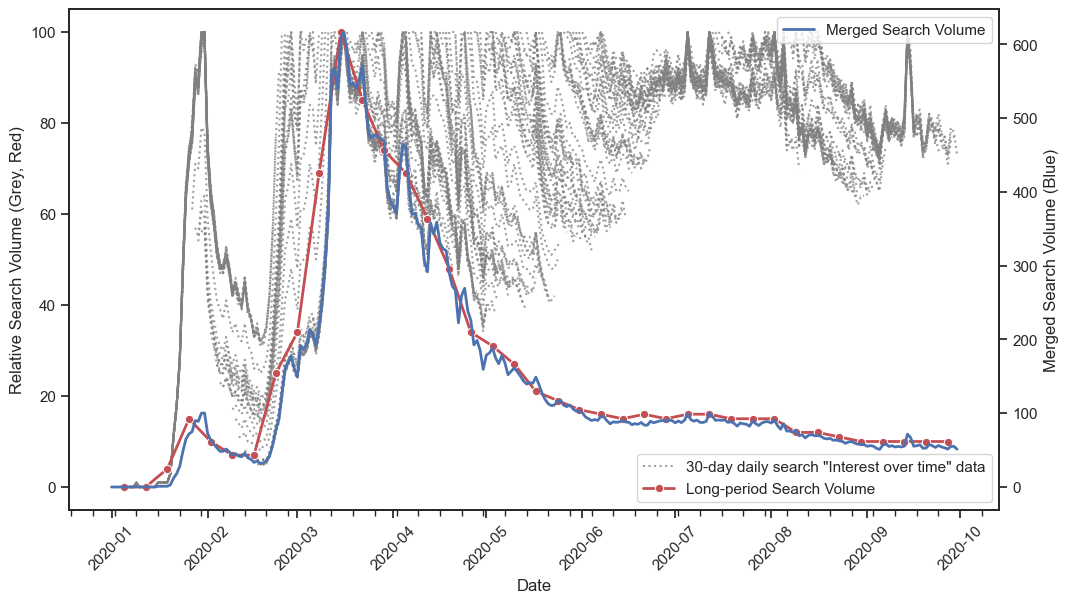

In [40]:
# sns.set(rc={'figure.figsize':(6, 3.25)})
sns.set(rc={'figure.figsize':(12, 6.5)})
sns.set_theme(style="ticks")

fig, ax1 = plt.subplots()
ax2 = plt.twinx()

start_date = date.fromisoformat('2020-01-01')
end_date   = date.fromisoformat('2020-09-01')

index = 0
current_date = start_date
while (current_date <= end_date):
    index += 1
    source_df = pd.read_csv(
        f"../../data/external/gt/rsvs/.m.01cpyy/{current_date}.csv", names=colnames, usecols = range(2),
        skiprows=1, index_col=False, parse_dates=['date'])

    label = None
    if index == 1:
        label = "30-day daily search \"Interest over time\" data"
    sns.lineplot(
        data=source_df, x="date", y="index",
        color="grey", 
        linestyle=":",
        label=label,
        alpha=0.75,
        linewidth=1.5, ax = ax1, zorder=2)

    current_date += timedelta(days=1)

print("index: ", index)

sns.lineplot(
    data=df_reference, x="date", y="index",
    color="r",
    label="Long-period Search Volume",
    linewidth=2, ax = ax1, zorder=2,
    marker="o"
)

sns.lineplot(
    data=df_merged, x="date", y="index", 
    color="b",
    label="Merged Search Volume",
    linewidth=2, ax = ax2, zorder=3)

ax1.set_xlabel("Date")
ax1.set_ylabel("Relative Search Volume (Grey, Red)")
ax2.set_ylabel("Merged Search Volume (Blue)")

ax1.xaxis.set_major_locator(DayLocator(interval=7))
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=7))

plt.savefig('../../graphs/Figure01_GT-Merge-Example.pdf', bbox_inches='tight')
plt.savefig('../../graphs/Figure01_GT-Merge-Example.png', bbox_inches='tight')
plt.show()